**ASSIGNMENT - 2**

Q1.Dataset: Energy Efficiency Dataset (https://archive.ics.uci.edu/ml/datasets/Energy+efficiency)

The dataset contains 768 samples, each with attributes related to the design of buildings such as wall area, roof area, overall height, glazing area, and orientation. It includes two target variables: the heating load (energy required for heating) and the cooling load (energy required for cooling) of the building. The dataset is relevant for optimizing building energy efficiency and minimizing consumption.
Your objective is to predict the Heating Load of a building based on its physical attributes and architectural design.

In [1]:
#first importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
#importing the file
df = pd.read_excel('ENB2012_data.xlsx')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


***(i) Perform data pre-processing steps on the dataset. Handle missing values (if any), explore the correlation between variables, and identify any potential outliers***

In [3]:
#checking for missing values
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [4]:
# Statistical summary of the dataset
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


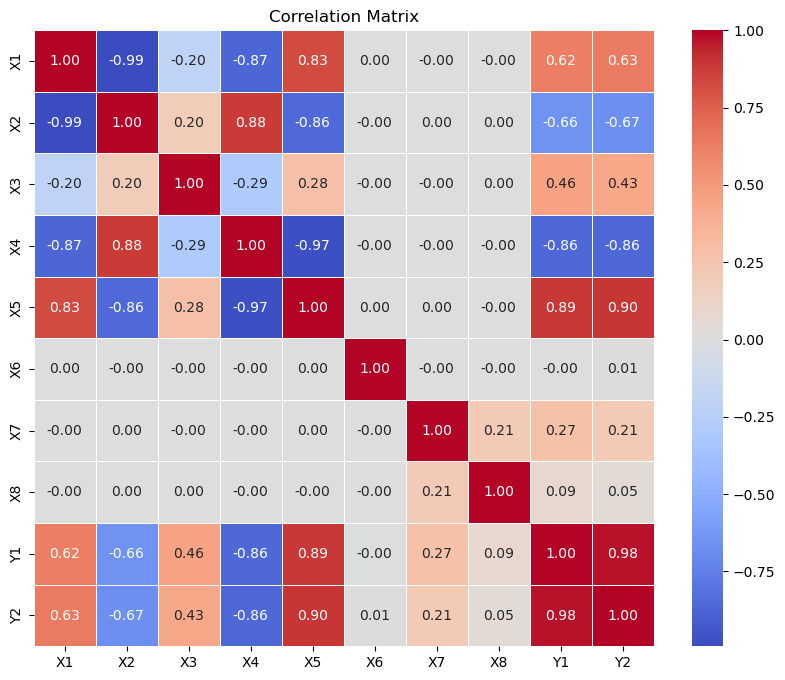

In [5]:
# Explore correlation between variables
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [6]:
# after finding correlation between variables . for predicting y1 , X2 and X4 is not imp as it shows negative value for y1
df = df.drop(['X2' , 'X4'] , axis = 1 )

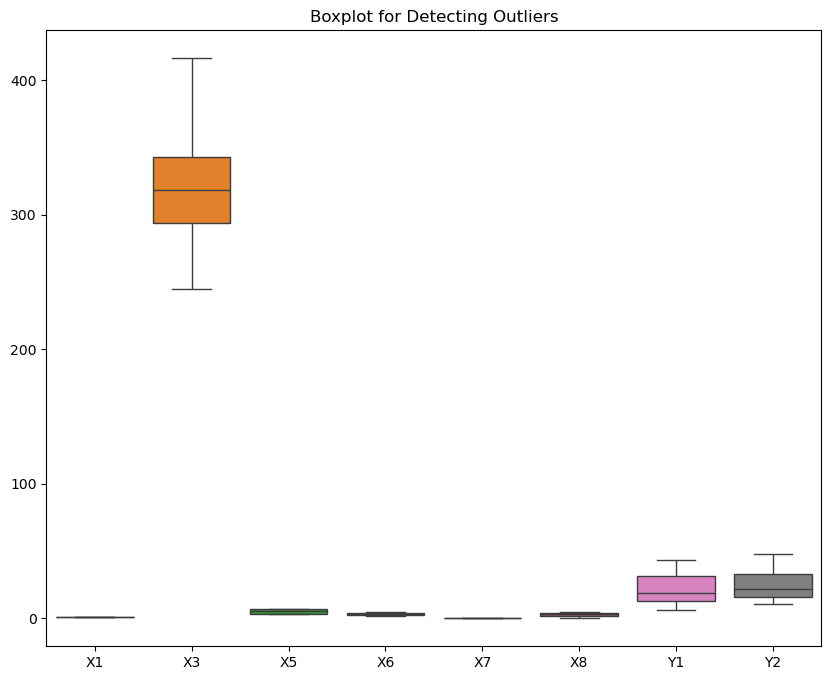

In [7]:
# Identify potential outliers using boxplots
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.title("Boxplot for Detecting Outliers")
plt.show()

**no outliers detected**

***(ii) Split the dataset into an 80:20 ratio for training and testing using the sklearn library***

In [8]:
# Define features (X) and target (y)
X = df.drop(columns=['Y1', 'Y2'])  # Drop target variables
y = df["Y1"]

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (important for Ridge and Lasso regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


***(iii) Train a multivariate linear regression model from scratch using numpy, pandas, and matplotlib. Additionally, train a linear regression model using the sklearn library on the training dataset. Also train ridge and lasso regression model using the sklearn library on the training dataset***

In [9]:
#creating manual linear regression using normal equation theta = (XTX)-1XTy
def linear_regression(X_train ,  y_train):
    # Add intercept column to X_train
    X_train_b =  np.c_[np.ones(X_train.shape[0]), X_train]
     # Calculate coefficients using the Normal Equation
    theta = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)
    return theta

# Training the model (from scratch)
theta_manual = linear_regression(X_train_scaled, y_train)
print(theta_manual)

[22.15503257 -1.39118171  1.59288178  9.65507366 -0.02454408  2.7149263
  0.33619866]


In [10]:
# Linear regression using sklearn
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
print(lr.intercept_)
print(lr.coef_)

22.1550325732899
[-1.39118171  1.59288178  9.65507366 -0.02454408  2.7149263   0.33619866]


In [11]:
# Lasso Regression using sklearn
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)
print(lasso_reg.intercept_)
print(lasso_reg.coef_)

22.1550325732899
[-0.          2.16130156  8.24667298 -0.          2.63576533  0.24724018]


In [12]:
# Ridge Regression using sklearn
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)
print(ridge_reg.intercept_)
print(ridge_reg.coef_)

22.1550325732899
[-1.24477499  1.66281749  9.4992238  -0.02604625  2.71116121  0.33597745]


***(iv) Evaluate the performance for each model on the test dataset using following metrics: R2 score, Mean Squared Error (MSE) and Root Mean Squared Error(RMSE). Compare the performance of the manual model and the sklearn model and plot the predicted vs actual values for both models***

In [13]:
# Predictions for each model on the test set
y_pred_manual = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled].dot(theta_manual)
y_pred_sklearn = lr.predict(X_test_scaled)
y_pred_ridge = ridge_reg.predict(X_test_scaled)
y_pred_lasso = lasso_reg.predict(X_test_scaled)

In [14]:
# Calculate metrics
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return r2, mse, rmse

In [15]:
# Evaluate manual model (from scratch)
r2_manual, mse_manual, rmse_manual = calculate_metrics(y_test, y_pred_manual)
# Evaluate sklearn models
r2_sklearn, mse_sklearn, rmse_sklearn  = calculate_metrics(y_test, y_pred_sklearn)
r2_ridge, mse_ridge, rmse_ridge  = calculate_metrics(y_test, y_pred_ridge)
r2_lasso, mse_lasso, rmse_lasso  = calculate_metrics(y_test, y_pred_lasso)

# Print results
print(f"Manual Linear Regression: R²={r2_manual:.4f}, MSE={mse_manual:.4f}, RMSE={rmse_manual:.4f} ")
print(f"Sklearn Linear Regression: R²={r2_sklearn:.4f}, MSE={mse_sklearn:.4f}, RMSE={rmse_sklearn:.4f}")
print(f"Ridge Regression: R²={r2_ridge:.4f}, MSE={mse_ridge:.4f}, RMSE={rmse_ridge:.4f} ")
print(f"Lasso Regression: R²={r2_lasso:.4f}, MSE={mse_lasso:.4f}, RMSE={rmse_lasso:.4f} ")

Manual Linear Regression: R²=0.9086, MSE=9.5263, RMSE=3.0865 
Sklearn Linear Regression: R²=0.9086, MSE=9.5263, RMSE=3.0865
Ridge Regression: R²=0.9084, MSE=9.5517, RMSE=3.0906 
Lasso Regression: R²=0.9046, MSE=9.9392, RMSE=3.1526 


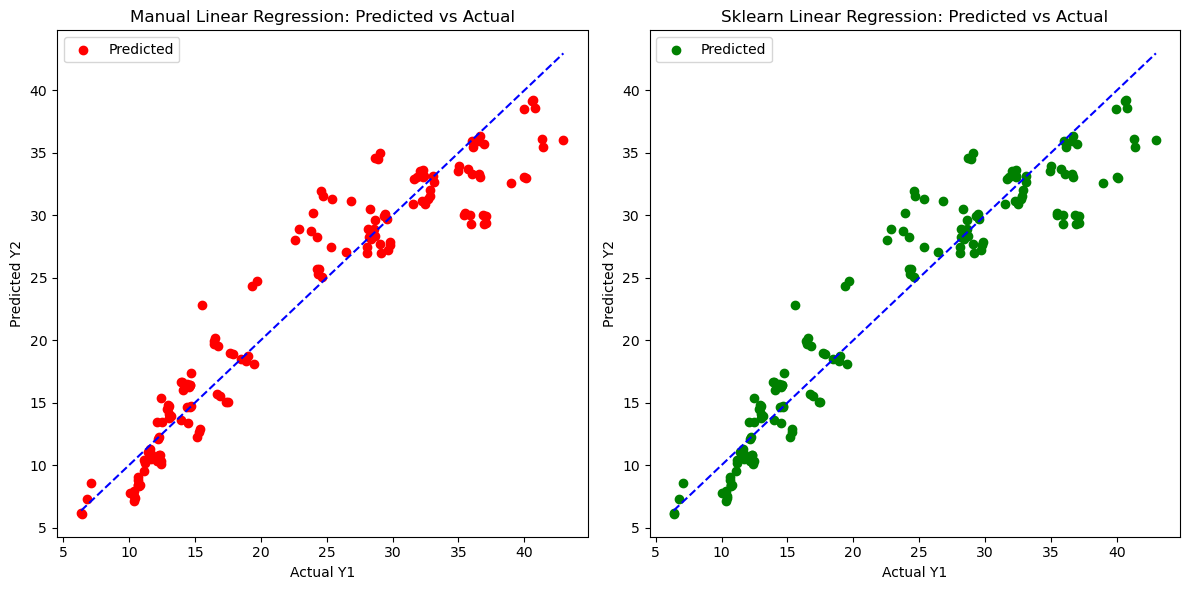

In [16]:
# Plot Predicted vs Actual for both manual and sklearn models
plt.figure(figsize=(12, 6))

# Plot for Manual Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_manual, color='red', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--')
plt.xlabel("Actual Y1")
plt.ylabel("Predicted Y2")
plt.title("Manual Linear Regression: Predicted vs Actual")
plt.legend()

# Plot for Sklearn Linear Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_sklearn, color='green', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--')
plt.xlabel("Actual Y1")
plt.ylabel("Predicted Y2")
plt.title("Sklearn Linear Regression: Predicted vs Actual")
plt.legend()

plt.tight_layout()
plt.show()

***(v) Propose energy efficiency improvement suggestions based on the insights from the model results, focusing on building design elements that most significantly impact heating load***



Model Insights:
Feature Importance: Use the coefficients from the linear models to determine which features (e.g., wall area, roof area) most impact the heating load. The higher the magnitude of the coefficient, the more influence that feature has on the target variable (heating load).
Ridge and Lasso: These models add regularization and help reduce overfitting by penalizing large coefficients. The features that remain with high coefficients after regularization can be seen as the most influential.
Suggestions:
Optimize Glazing Area: Larger glazing areas may lead to higher energy consumption due to heat loss. Reducing glazing area can potentially lower the heating load.
Roof Area and Insulation: Roof area, if not properly insulated, can result in higher heating loads. Proper insulation or reducing roof area might improve energy efficiency.
Orientation: Buildings oriented towards the sun may have higher cooling requirements but could reduce heating needs by utilizing solar energy.